<a href="https://colab.research.google.com/github/Deepspacee12/Stock_detection_apple/blob/main/LSTM_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import math
from numpy import array

In [2]:
key ='8d83977ac8801aefe88ffd8ee6430a7f72326094'

**Collecting the dataset**

In [3]:
df=pdr.get_data_tiingo('AAPL',api_key= key)


<ipython-input-3-fcd4193ea8f6>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key= key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head

<bound method NDFrame.head of                                    close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-10-12 00:00:00+00:00  222.11  222.88  216.84  220.42  40337851   
       2018-10-15 00:00:00+00:00  217.36  221.83  217.27  221.16  30791007   
       2018-10-16 00:00:00+00:00  222.15  222.99  216.76  218.93  29183963   
       2018-10-17 00:00:00+00:00  221.19  222.64  219.34  222.30  22885397   
       2018-10-18 00:00:00+00:00  216.02  219.74  213.00  217.86  32581315   
...                                  ...     ...     ...     ...       ...   
       2023-10-04 00:00:00+00:00  173.66  174.21  170.97  171.09  53020286   
       2023-10-05 00:00:00+00:00  174.91  175.45  172.68  173.79  48527918   
       2023-10-06 00:00:00+00:00  177.49  177.99  173.18  173.80  57266675   
       2023-10-09 00:00:00+00:00  178.99  179.05  175.80  176.81  42390772   
       2023-10-10 00:00:00+00:00  

**we will be predicting the clossing prize**

In [6]:
df1 = df.reset_index()['close']

In [7]:
df1.shape

(1256,)

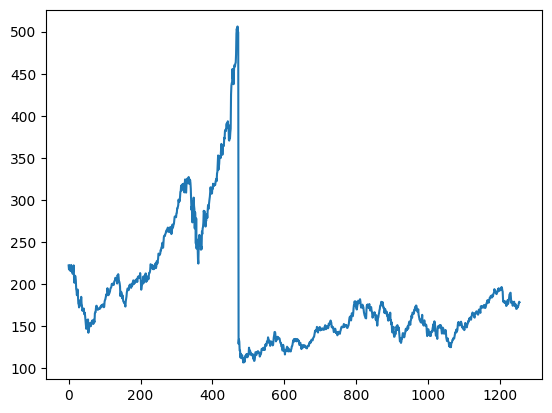

In [8]:
plt.plot(df1)

**LSTM must use min max scaler**

In [9]:
scalar = MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(1256, 1)

spliting dataset into training and testing

In [11]:
training_set=int(len(df1)*0.65)
test_set = len(df1)-training_set

In [12]:
train_data,test_data=df1[0:training_set,:],df1[training_set:len(df1),:1]

In [13]:
train_data.shape

(816, 1)

**preprocessing**

In [ ]:
#converting an arry of values into a dataset matrix

In [14]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

**reshaping it**

In [15]:
time_step=100
x_train,y_train= create_dataset(train_data,time_step)
x_test,y_test= create_dataset(test_data,time_step)

In [16]:
x_test

array([[0.1636819 , 0.17092048, 0.17204759, ..., 0.10519724, 0.10487163,
        0.11113338],
       [0.17092048, 0.17204759, 0.1636819 , ..., 0.10487163, 0.11113338,
        0.096531  ],
       [0.17204759, 0.1636819 , 0.16588604, ..., 0.11113338, 0.096531  ,
        0.09843456],
       ...,
       [0.16463369, 0.16338134, 0.16338134, ..., 0.16758923, 0.16420789,
        0.16736381],
       [0.16338134, 0.16338134, 0.16493425, ..., 0.16420789, 0.16736381,
        0.17049468],
       [0.16338134, 0.16493425, 0.17084534, ..., 0.16736381, 0.17049468,
        0.17695679]])

In [31]:
#reshapint it for the LSTM model

In [17]:
X_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
X_test =x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
X_train

array([[[0.28871634],
        [0.27681904],
        [0.28881653],
        ...,
        [0.16951785],
        [0.16445836],
        [0.16548528]],

       [[0.27681904],
        [0.28881653],
        [0.28641202],
        ...,
        [0.16445836],
        [0.16548528],
        [0.18048842]],

       [[0.28881653],
        [0.28641202],
        [0.27346274],
        ...,
        [0.16548528],
        [0.18048842],
        [0.18552286]],

       ...,

       [[0.10532248],
        [0.10584847],
        [0.11090795],
        ...,
        [0.17873513],
        [0.17715717],
        [0.18827802]],

       [[0.10584847],
        [0.11090795],
        [0.10857858],
        ...,
        [0.17715717],
        [0.18827802],
        [0.18249217]],

       [[0.11090795],
        [0.10857858],
        [0.0989856 ],
        ...,
        [0.18827802],
        [0.18249217],
        [0.17051972]]])

# creating a LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='MeanSquaredError',optimizer='adam')

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 518ms/step - loss: 0.0444 - val_loss: 0.0010
Epoch 2/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0218 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0126 - val_loss: 4.3518e-04
Epoch 4/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0092 - val_loss: 3.7873e-04
Epoch 5/100
12/12 [==============================] - 3s 285ms/step - loss: 0.0080 - val_loss: 5.9715e-04
Epoch 6/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0074 - val_loss: 2.6724e-04
Epoch 7/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0067 - val_loss: 5.1395e-04
Epoch 8/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0066 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0064 - val_loss: 2.4585e-04
Epoch 10/100
12/12 [==============================] - 3s 225ms/ste

# doing prediction

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


reversing the transform

In [52]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

calculaingRMS preforming matrix

In [45]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.2917892479068

In [46]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

160.47624978614323

ploting


In [ ]:
#green color is the predicted output

In [50]:
#shift train prediction for ploting
look_back = 100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

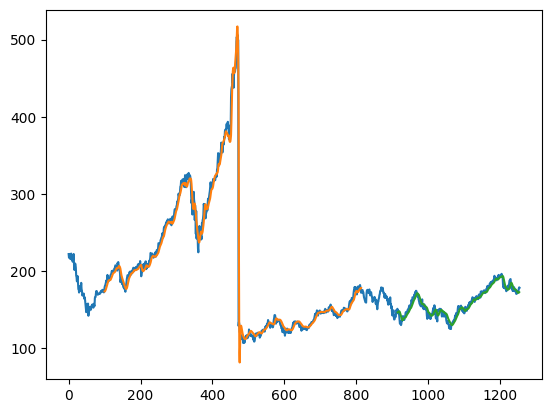

In [53]:
#ploting
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# predicting the next 30 days

In [55]:
len(test_data)

440

In [56]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

creating a list

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823418910457104,
 0.21445209768315587,
 0.21162179085785848,
 0.21282404508453345,
 0.20999373825923606,
 0.20480901690670006,
 0.20348152786474638,
 0.20771446462116466,
 0.20964308077645577,
 0.21001878522229173,
 0.21828428303068248,
 0.2176330619912335,
 0.22106449592986843,
 0.21613024420788973,
 0.21314965560425791,
 0.215178459611772,
 0.21735754539762048,
 0.2195

In [73]:
first_output=[]
n_steps=100
i=0
while(i<100):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day input {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    first_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    first_output.extend(yhat.tolist())
    i=i+1

0 day input [0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503
 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515 0.17815905
 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517 0.16310582
 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789 0.16736381
 0.17049468 0.17695679 0.18071384 0.17921102 0.16976273 0.17119604
 0.17176163 0.17180461 0.1716024  0.17132005 0.17103764 0.17078504
 0.1705671  0.17037794 0.17020765 0.17004609 0.16988412 0.16971394
 0.16952989 0.16932794 0.16910639 0.16886497 0.1686

In [74]:
day_new=np.arange(1 , 101)
day_prep=np.arange(101,131)

In [75]:
len(df1)

1256

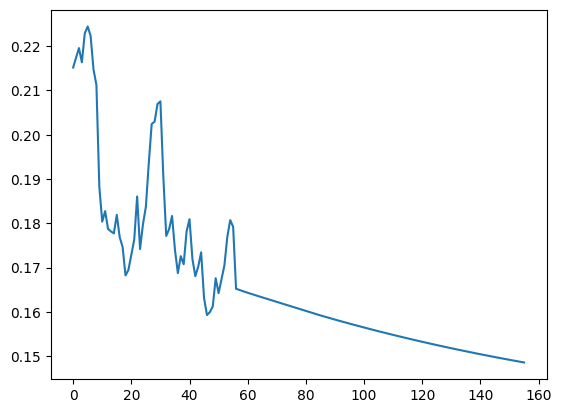

In [76]:
df3=df1.tolist()
df3.extend(first_output)
plt.plot(df3[1200:])

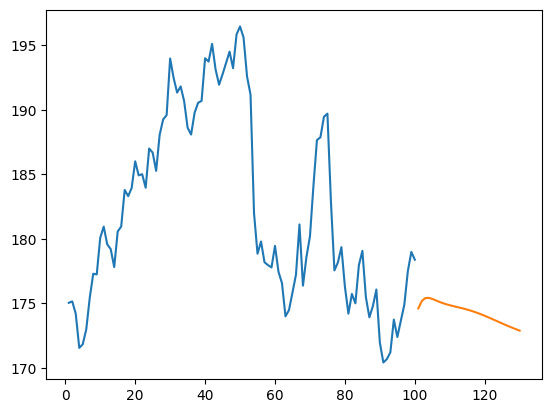

In [70]:
plt.plot(day_new,scalar.inverse_transform(df1[1156:]))
plt.plot(day_prep,scalar.inverse_transform(first_output))

In [ ]:
plt.plot(df3[1000:])